In [1]:
import pandas as pd

SDSS_DR16 = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(SDSS_DR16)
df

,Unnamed: 0,specObjID,ra,dec,z,zErr,Types,d4000_n,sigmaStars,fracDeV_r,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,0,2795715636188178432,162.87876,16.838215,0.022297,0.000007,elliptical,1.939160,128.97870,1.000000,17.35997,15.50984,14.68634,14.30167,14.01772
1,1,2840803871343798272,240.39499,11.850668,0.053161,0.000011,elliptical,1.944695,183.85820,0.935781,19.15590,17.14306,16.24167,15.81783,15.50098
2,2,2800218136303921152,164.66952,16.900165,0.068568,0.000009,spiral,1.282932,81.20707,0.420175,18.36842,17.18698,16.64672,16.31816,16.09746
3,3,2800232155077175296,164.85617,16.979098,0.083634,0.000019,spiral,1.565293,97.63731,0.170645,18.47494,17.25055,16.64057,16.32310,16.13419
4,4,2849703318459017216,245.52298,10.278617,0.128543,0.000025,spiral,1.453489,219.17930,0.478295,19.32188,17.80865,17.02585,16.56203,16.39108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525335,583519,2795713986920736768,162.43700,17.284938,0.056785,0.000006,spiral,1.123235,98.59753,0.000000,19.50647,17.86611,17.53326,17.20054,17.99106
525336,583520,2916209471627749376,155.78431,15.811398,0.145377,0.000023,elliptical,1.496544,148.20890,1.000000,20.09706,18.75447,17.76428,17.33186,17.03715
525337,583522,2920722966893324288,159.56049,16.508320,0.178770,0.000020,spiral,1.549078,91.99490,0.407970,19.59916,18.35870,17.55004,17.16154,17.01065
525338,583523,2792375044968310784,161.67263,16.703673,0.056509,0.000008,spiral,1.398121,83.41415,0.282227,19.66740,18.04996,17.17682,16.70945,16.39195


In [2]:
import numpy as np

Types = df.loc[:, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '0').replace('spiral', '1')).astype(int)

X = np.array(df.loc[:, 'petroMag_u':'petroMag_z'])
y = np.array(types)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [4]:
# .shape = ดูขนาดของข้อมูล
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(X_test)

(394005, 5)
[[18.01291 16.67832 16.1865  15.88721 15.75437]
 [20.21619 18.17599 17.19482 16.80832 16.4698 ]
 [19.41963 17.94184 17.16086 16.76941 16.4398 ]
 ...
 [19.66282 17.80849 16.73261 16.28713 15.95521]
 [18.57667 17.74242 17.33324 17.01546 16.90319]
 [19.87639 18.19953 17.23245 16.76843 16.39096]]
(131335, 5)
[[19.60983 17.83717 16.90383 16.51098 16.18468]
 [17.72956 16.51022 16.05344 15.77668 15.83779]
 [18.96586 17.35411 16.55898 16.17156 15.94298]
 ...
 [18.40866 16.82027 16.05136 15.64841 15.35792]
 [17.98657 16.8621  16.359   16.02794 15.97433]
 [19.09756 18.20892 17.68531 17.34197 17.44923]]


In [14]:
'''
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

C = 1000000000
gamma = 0.0001

# RBF Kernel
clf_rbf = Pipeline(
    [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))])

clf_fit = clf_rbf.fit(X_train, y_train)
clf_fit
'''

'\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.svm import SVC\n\nC = 1000000000\ngamma = 0.0001\n\n# RBF Kernel\nclf_rbf = Pipeline(\n    [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))])\n\nclf_fit = clf_rbf.fit(X_train, y_train)\nclf_fit\n'

In [6]:
import pickle
'''
# save train-test data
clf_save = open('clf_fix_all.csv', 'wb')
pickle.dump(clf_fit, clf_save)
clf_save.close()
'''

"\n# save train-test data\nclf_save = open('clf_fix_all.csv', 'wb')\npickle.dump(clf_fit, clf_save)\nclf_save.close()\n"

In [7]:
# load data
clf_read = open('clf_fix_all.csv', 'rb')
clf = pickle.load(clf_read)
clf


Pipeline(steps=[('rbf_svc', SVC(C=1000000000, gamma=0.0001))])

In [17]:
'''
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)

print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))
'''

'\ntrain = clf.score(X_train, y_train)\ntest = clf.score(X_test, y_test)\n\nprint("Train set accuracy = " + str(train))\nprint("Test set accuracy = " + str(test))\n'

Train set accuracy = 0.8506059567771983

Test set accuracy = 0.8472227509803175

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cmap = 'Blues'
label_name = 'Elliptical', 'Spiral'

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap=cmap, display_labels=label_name)
    
plt.show()

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(53307, 8496, 11569, 57963)

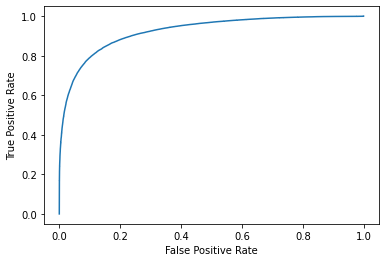

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

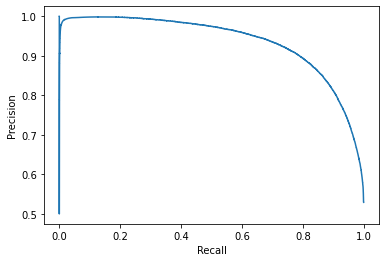

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])

pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()